In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterSampler
import hdbscan

from scipy.spatial.distance import cdist
from scipy.stats import randint
import clustering

In [136]:
from IPython.core.interactiveshell import InteractiveShell
from importlib import reload
reload(clustering)
from clustering import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

InteractiveShell.ast_node_interactivity = 'all'
sns.set()
sns.set(rc={'figure.figsize':(12,8)})

<module 'clustering' from 'C:\\Users\\LCI_user\\Documents\\GitHub\\LCI-Clustering\\clustering.py'>

## Loading Data

In [3]:
df = pd.read_csv('Diskovery_Cell1_ThunderSTORM.csv')
df.head()
df = df.sort_values(by=['intensity [photon]'])

id  frame       x [nm]        y [nm]  sigma [nm]  intensity [photon]  \
0  1.0    1.0  2474.998618   6736.088180  195.815722         1841.965445   
1  2.0    1.0  4356.136836  14133.322371  145.009192         5599.702004   
2  3.0    1.0  4542.775300   9091.265025  121.313419          221.442108   
3  4.0    1.0  5977.444344   7594.973438  137.276419          155.518749   
4  5.0    1.0  6079.459555  11231.168432  137.261612         2693.631410   

   offset [photon]  bkgstd [photon]  uncertainty [nm]  
0        80.087915        10.501425          9.781846  
1        82.962749        24.851702          4.184589  
2        39.507939         4.162599         15.045367  
3        39.499220         4.681645         24.730111  
4        59.415820        11.278048          4.647010

## Displaying Raw Data

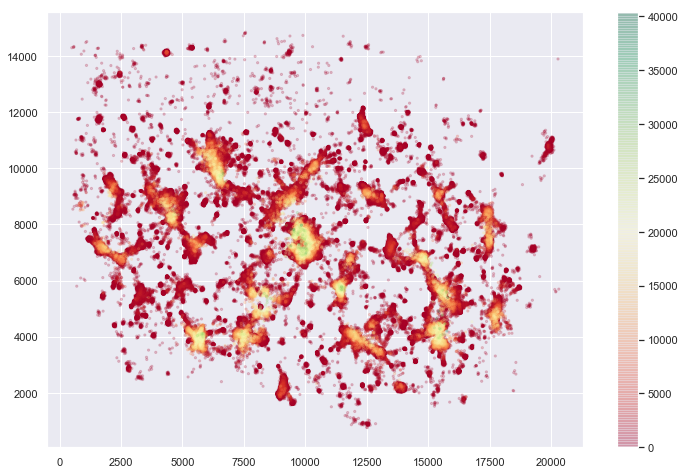

In [5]:
img = plt.scatter(df['x [nm]'],
                  df['y [nm]'],
                  c=df['intensity [photon]'],
                  s=5, cmap='RdYlGn',alpha=0.2)
_ = plt.colorbar(img)

## HDBSCAN

In [24]:
XY = df[['x [nm]', 'y [nm]']].sample(frac=0.2, random_state=1234).values

param_dist = {"min_cluster_size": randint(800, 1100),
              "min_samples": randint(600, 900)} # "alpha": np.round(np.linspace(0.1,2,100),2)
    
results = random_search_custom_hdb(param_dist,XY,n=2000)
results.head(10)

100%|███████████████████████████████████| 1987/1987 [14:46:54<00:00, 26.94s/it]


score  min_cluster_size  min_samples
319   0.437              1089          629
831   0.437              1090          629
1579  0.437              1052          629
769   0.437              1056          631
1130  0.437              1066          631
1962  0.437              1059          611
508   0.437              1096          629
1577  0.437              1030          629
327   0.437              1073          611
1706  0.437              1032          631

In [ ]:
# results.to_csv('Hyper-param-search3.csv', index=0)
results.plot.scatter('min_cluster_size', 'min_samples', c='score', cmap='RdYlGn')

In [37]:
XY = df[['x [nm]', 'y [nm]']].sample(frac=0.2, random_state=1234).values

hdb = hdbscan.HDBSCAN(core_dist_n_jobs=6,min_cluster_size=1090,min_samples=629,gen_min_span_tree=True)
_ = hdb.fit(XY)
# hdb.relative_validity_

0.43672972146224687

In [ ]:
dbscan_verbose(hdb, XY, plot=True,p=0.05)

In [ ]:
view_cluster(hdb,XY,46,p=0.1)

c:\users\lci_user\miniconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\users\lci_user\miniconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


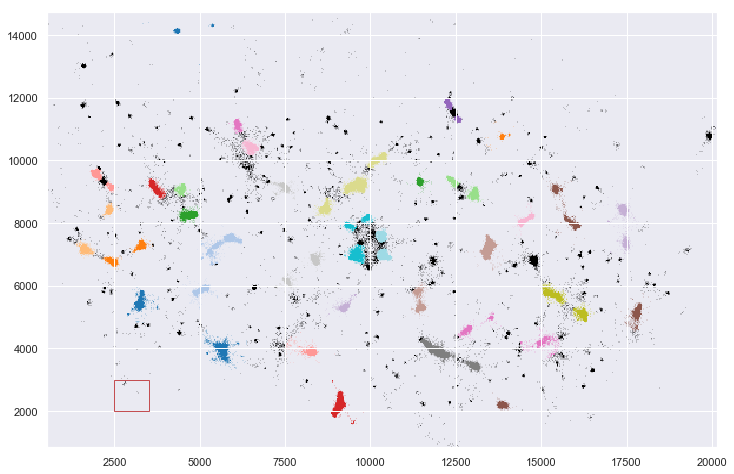

In [137]:
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
dbscan_verbose_lite(hdb, XY, p=0.0, ax=ax)

rect = patches.Rectangle((2500,2000),1000,1000,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
# rect.remove()